In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data from file
file_path = "./food_service_waste.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
data.head(20)


,Region,M49 code,Country,Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate
0,Australia and New Zealand,36,Australia,22,"546,340",High Confidence
1,Australia and New Zealand,554,New Zealand,26,"122,306",Low Confidence
2,Central Asia,398,Kazakhstan,28,"512,910",Very Low Confidence
3,Central Asia,417,Kyrgyzstan,28,"177,387",Very Low Confidence
4,Central Asia,762,Tajikistan,28,"257,708",Very Low Confidence
5,Central Asia,795,Turkmenistan,28,"164,288",Very Low Confidence
6,Central Asia,860,Uzbekistan,28,"911,881",Very Low Confidence
7,Eastern Asia,156,China,46,"65,377,741",High Confidence
8,Eastern Asia,344,"China, Hong Kong SAR",26,"190,147",Low Confidence
9,Eastern Asia,446,"China, Macao SAR",26,"16,375",Low Confidence


In [14]:
# Check the data type of the column
print(data['Food service estimate (tonnes/year)'].dtype)

int64


In [24]:
# Remove commas from the values in 'Food service estimate (tonnes/year)' column and convert to numeric
data['Food service estimate (tonnes/year)'] = pd.to_numeric(data['Food service estimate (tonnes/year)'].apply(lambda x: re.sub(r',', '', str(x))), errors='coerce').fillna(0)


In [33]:
# Display the first few rows of the 'Food service estimate (tonnes/year)' column
print(data['Food service estimate (tonnes/year)'].head())

0    546340
1    122306
2    512910
3    177387
4    257708
Name: Food service estimate (tonnes/year), dtype: int64


In [41]:
# Group data by 'Region' and calculate statistical summaries
region_statistics = data.groupby('Region').agg({
    'Food service estimate (tonnes/year)': ['mean', 'median', 'sum', 'std']
}).reset_index()

print(region_statistics)


                             Region Food service estimate (tonnes/year)  \
                                                                   mean   
0         Australia and New Zealand                        3.343230e+05   
1                      Central Asia                        4.048348e+05   
2                      Eastern Asia                        9.937663e+06   
3                    Eastern Europe                        7.940570e+05   
4   Latin America and the Caribbean                        4.243062e+05   
5                         Melanesia                        6.025820e+04   
6                        Micronesia                        2.071429e+03   
7                   Northern Africa                        1.111445e+06   
8                  Northern America                        5.473622e+06   
9                   Northern Europe                        1.685236e+05   
10                        Polynesia                        3.466000e+03   
11               South-ea

In [48]:
# Check the data type of the 'Food service estimate (kg/capita/year)' column
print(data['Food service estimate (kg/capita/year)'].dtype)

int64


In [49]:
# Display unique values in the "Food service estimate (kg/capita/year)" column
print(data['Food service estimate (kg/capita/year)'].unique())


[22 26 28 46 15 64 21 17 23 56  5 90  3  6 20 31 27 24 40]


In [54]:
# Convert the "Food service estimate (kg/capita/year)" column to numeric format, ignoring errors
data['Food service estimate (kg/capita/year)'] = pd.to_numeric(data['Food service estimate (kg/capita/year)'], errors='coerce')

In [58]:
#Group data by 'Region' and calculate statistical summaries for 'Food service estimate (kg/capita/year)'
region_statistics_kg_per_capita = data.groupby('Region').agg({
    'Food service estimate (kg/capita/year)': ['mean', 'median', 'sum', 'std']
}).reset_index()

print(region_statistics_kg_per_capita)


                             Region Food service estimate (kg/capita/year)  \
                                                                      mean   
0         Australia and New Zealand                              24.000000   
1                      Central Asia                              28.000000   
2                      Eastern Asia                              27.857143   
3                    Eastern Europe                              27.000000   
4   Latin America and the Caribbean                              27.190476   
5                         Melanesia                              27.600000   
6                        Micronesia                              26.857143   
7                   Northern Africa                              28.000000   
8                  Northern America                              35.500000   
9                   Northern Europe                              24.166667   
10                        Polynesia                             

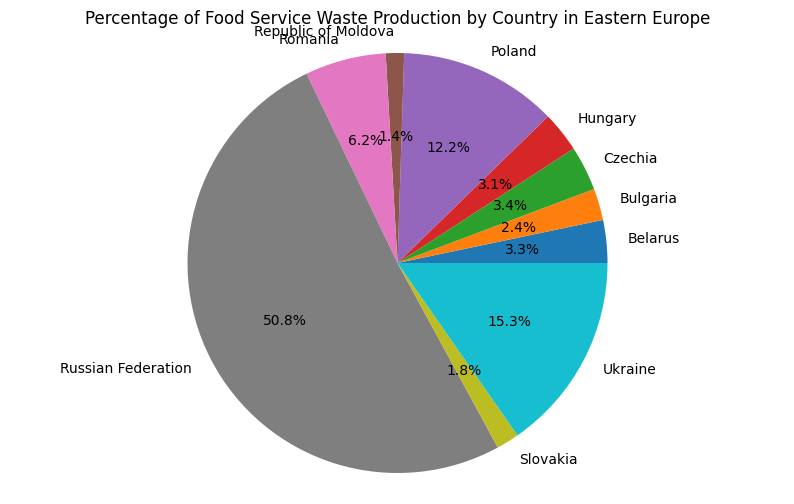

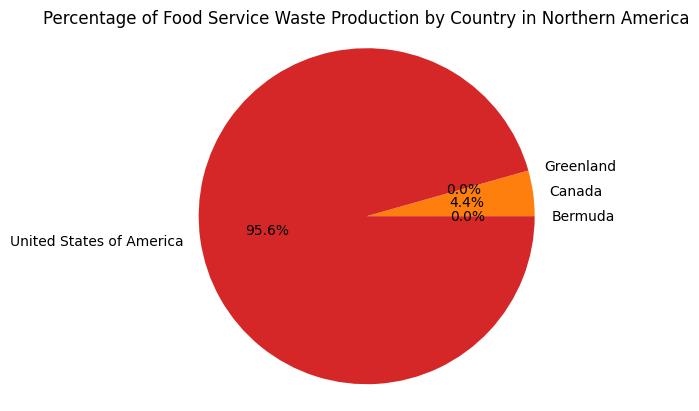

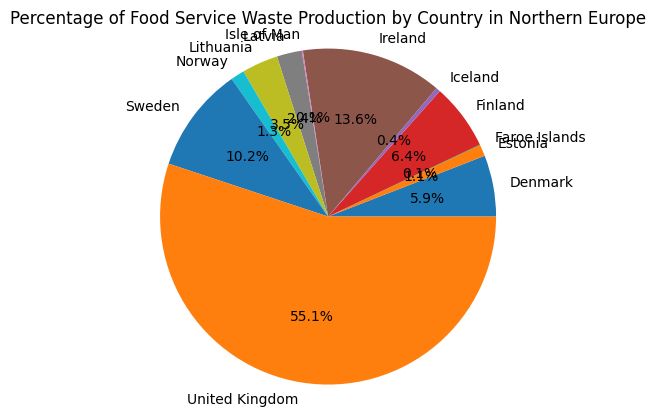

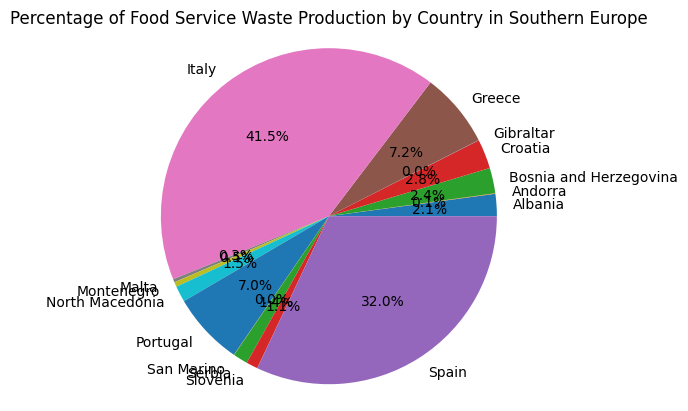

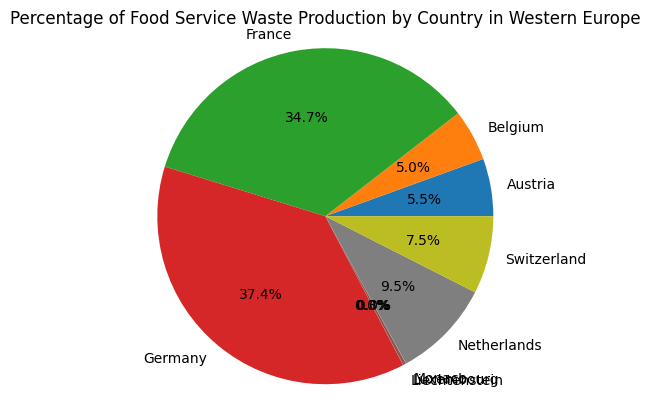

In [61]:
# Group the data by regions and countries and calculate the total amount of waste production for each country within the region
region_country_grouped = data.groupby(['Region', 'Country'])['Food service estimate (tonnes/year)'].sum().reset_index()

# Calculate the percentage of waste production by each country within the region
region_country_grouped['Percentage'] = region_country_grouped.groupby('Region')['Food service estimate (tonnes/year)'].transform(lambda x: (x / x.sum()) * 100)

# Filtering data to select specific regions
selected_regions = ['Northern America', 'Northern Europe', 'Southern Europe', 'Western Europe', 'Eastern Europe']  # Replace this with the actual names of the regions you need
filtered_data = region_country_grouped[region_country_grouped['Region'].isin(selected_regions)]

# Plotting charts for selected regions
plt.figure(figsize=(10, 6))
for region, region_data in filtered_data.groupby('Region'):
    plt.pie(region_data['Percentage'], labels=region_data['Country'], autopct='%1.1f%%')
    plt.title(f'Percentage of Food Service Waste Production by Country in {region}')
    plt.axis('equal')  # Ensuring a circular format for the pie chart
    plt.show()

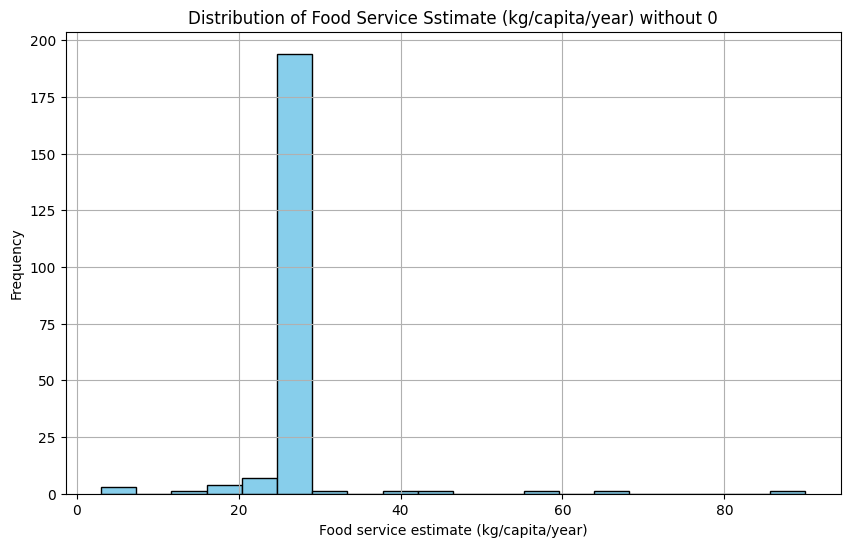

In [63]:
# Filter out values equal to 0
non_zero_values = data[data['Food service estimate (kg/capita/year)'] != 0]['Food service estimate (kg/capita/year)']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(non_zero_values, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Food Service Sstimate (kg/capita/year) without 0')
plt.xlabel('Food service estimate (kg/capita/year)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()